Clustering

K-Means Clustering

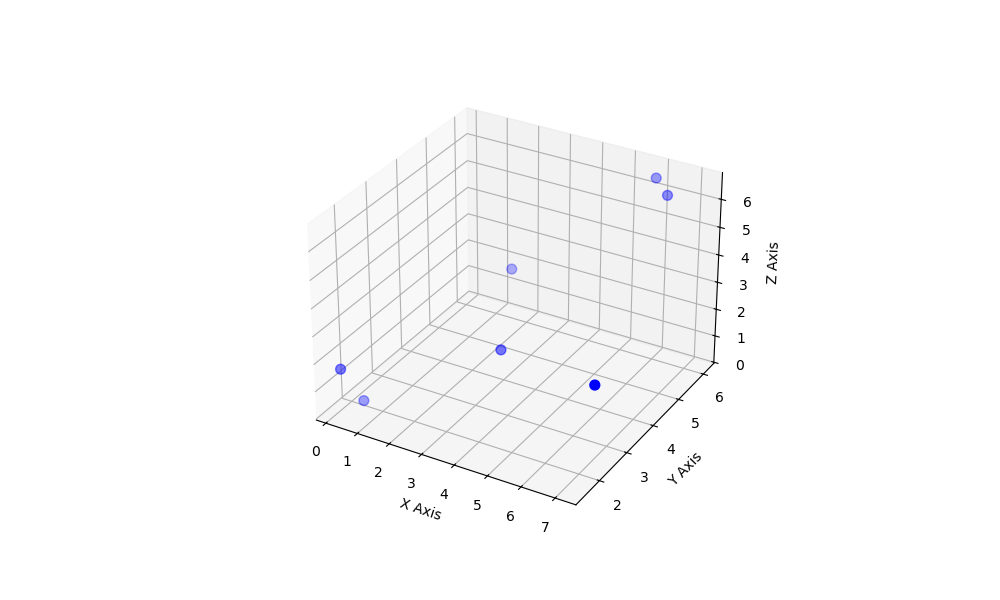

In [250]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data points (Cluster 1 and Cluster 2)
x = [0.2, 3.8, 0.6, 6.4, 3.0, 7.1, 5.9]
y = [1.5, 3.0, 1.8, 5.9, 4.3, 2.4, 6.1]
z = [1.7, 2.3, 0.4, 6.2, 3.8, 2.8, 6.5]

# Colors: Cluster 1 = Blue, Cluster 2 = Red
colors = ['blue'for i in range(len(x))]

# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [251]:
# kmeans algorithm
import random

k = 2
random_points = []
for i in range(k):
    random_point = random.randint(0, len(x)-1)
    random_points.append(random_point)
print(random_points)

distances = [[] for i in range(len(random_points))]

for n, i in enumerate(random_points):
    for p in range(len(x)):
        distance = (x[i] - x[p])**2 + (y[i] - y[p])**2 + (z[i] - z[p])**2
        distances[n].append(distance)

print(distances)

cluster_col = [row.index(min(row)) for row in zip(*distances)]
cluster_col


[4, 0]
[[20.089999999999996, 4.579999999999999, 23.57, 19.880000000000006, 0.0, 21.419999999999998, 18.940000000000005], [0.0, 15.569999999999997, 1.9399999999999995, 78.05000000000001, 20.089999999999996, 49.629999999999995, 76.69]]


[1, 0, 1, 0, 0, 0, 0]

In [252]:
fixed_colors = [
    'blue', 
    'red', 
    'indigo', 
    'green', 
    'orange', 
    'purple', 
    'pink', 
    'cyan', 
    'magenta', 
    'lime', 
    'teal', 
    'violet', 
    'gold', 
    'turquoise',  
    'crimson', 
    'coral', 
    'fuchsia', 
    'aqua'
]

colors = [fixed_colors[c] for c in cluster_col]

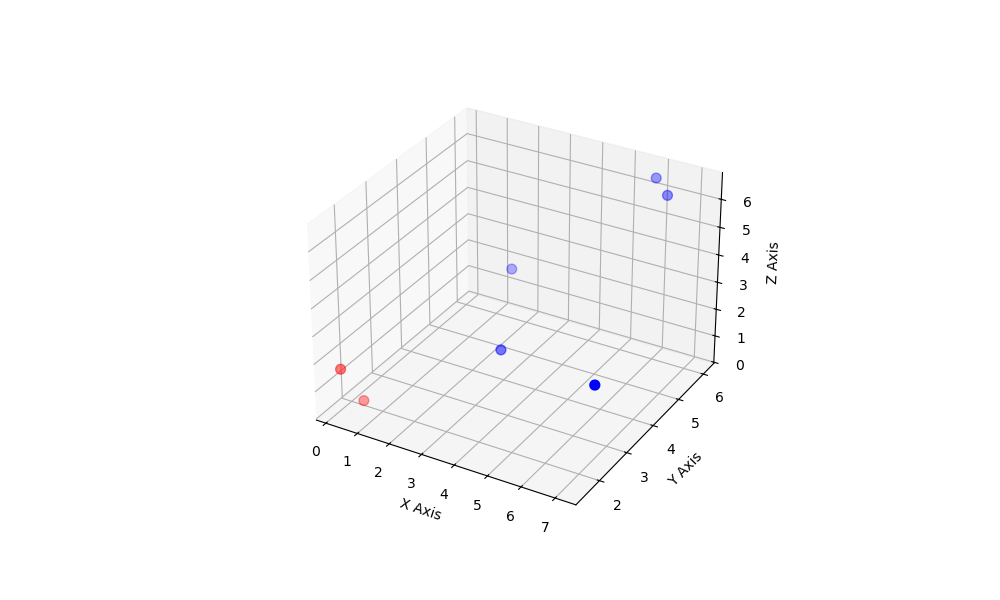

In [253]:
# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [254]:
prev_cluster_col = [-1] * len(x)    
iters = 0
cluster_dict = {j:[] for j in range(k)}
print(cluster_dict)
while(True):
    for key in cluster_dict:
        cluster_dict[key] = []
    
    for i, c in enumerate(cluster_col):
        cluster_dict[c].append(i)
    print(cluster_dict)
    # recalculate centroids
    centroids = []
    for k,v in cluster_dict.items():
        # Ensure there are no division by zero issues
        xs = [x[i] for i in v]
        xc = sum(xs)/len(xs) if len(xs) > 0 else 0  # Handle division by zero

        ys = [y[i] for i in v]
        yc = sum(ys)/len(ys) if len(ys) > 0 else 0  # Handle division by zero

        zs = [z[i] for i in v]
        zc = sum(zs)/len(zs) if len(zs) > 0 else 0  # Handle division by zero

        centroids.append([xc, yc, zc])

    distances = [[] for i in range(k+1)]

    for i, n in enumerate(centroids):
        for p in range(len(x)):
            distance = (n[0] - x[p])**2 + (n[1] - y[p])**2 + (n[2] - z[p])**2
            distances[i].append(distance)

    cluster_col = [row.index(min(row)) for row in zip(*distances)]
    print(cluster_col)
    
    if cluster_col == prev_cluster_col:
        break

    iters += 1
    prev_cluster_col = cluster_col
print(iters)

{0: [], 1: []}
{0: [1, 3, 4, 5, 6], 1: [0, 2]}
[1, 0, 1, 0, 0, 0, 0]
{0: [1, 3, 4, 5, 6], 1: [0, 2]}
[1, 0, 1, 0, 0, 0, 0]
1


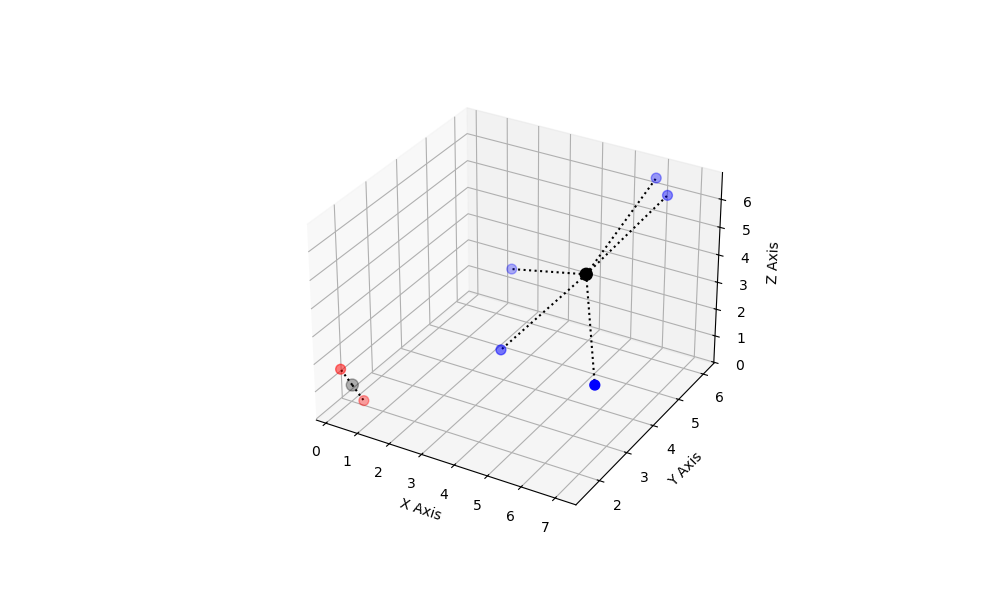

In [255]:
colors = [fixed_colors[c] for c in cluster_col]

cx = []
cy = []
cz = []

for c in centroids:
    cx.append(c[0])
    cy.append(c[1])
    cz.append(c[2])


# Create 3D plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with larger points and custom colors
ax.scatter(x, y, z, c=colors, s=50)  # 's' sets the size of points
ax.scatter(cx, cy, cz, c = 'black', s = 75)

# To plot dotted lines between points and centroids
for i, p in enumerate(cluster_col):
    # Plot the dotted line between the central point and the connected point
    ax.plot([cx[p], x[i]], [cy[p], y[i]], [cz[p], z[i]], linestyle=':', color='black')

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()